In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Read the train and test data

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')

In [3]:
train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [4]:
train.shape

(1117957, 22)

In [5]:
test.shape

(745305, 21)

In [6]:
# Split the data into dependent and independent
X = train.drop(['FloodProbability'], axis = 1)
X.head()    # Independent variables

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,0,5,8,5,8,6,4,4,3,3,...,2,5,3,3,5,4,7,5,7,3
1,1,6,7,4,4,8,8,3,5,4,...,9,7,2,0,3,5,3,3,4,3
2,2,6,5,6,7,3,7,1,5,4,...,6,7,3,7,5,6,8,2,3,3
3,3,3,4,6,5,4,8,4,7,6,...,5,2,4,7,4,4,6,5,7,5
4,4,5,3,2,6,4,4,3,3,3,...,5,2,2,6,6,4,1,2,3,5


In [7]:
y = train['FloodProbability']
y.head()    # Dependent variable

0    0.445
1    0.450
2    0.530
3    0.535
4    0.415
Name: FloodProbability, dtype: float64

In [8]:
X.select_dtypes(include = 'object')

""
0
1
2
3
4
...
1117952
1117953
1117954
1117955


#### So basically no categorical features

In [9]:
# Check for missing values
X.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
dtype: int64

In [10]:
test.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
dtype: int64

In [11]:
# Ok cool!! No missing values!

In [12]:
# Now let's see the correlation
X_corr = train.corr()
X_corr

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,1.000000,-0.000093,-0.001518,-0.000413,-0.000080,0.000580,-0.000188,0.000133,0.000281,-0.000103,...,0.000558,-0.001386,0.001078,0.000215,-0.000385,0.000625,0.000931,-0.001535,-0.000155,-0.000184
MonsoonIntensity,-0.000093,1.000000,-0.007362,-0.008070,-0.007251,-0.009309,-0.008031,-0.007787,-0.007836,-0.008232,...,-0.009716,-0.010659,-0.009121,-0.008900,-0.008486,-0.008679,-0.006811,-0.008155,-0.008474,0.189098
TopographyDrainage,-0.001518,-0.007362,1.000000,-0.009924,-0.008548,-0.010532,-0.009619,-0.007607,-0.009824,-0.009496,...,-0.010056,-0.012526,-0.010240,-0.011067,-0.006628,-0.010815,-0.010267,-0.011617,-0.012350,0.187635
RiverManagement,-0.000413,-0.008070,-0.009924,1.000000,-0.008574,-0.012292,-0.009237,-0.008711,-0.010058,-0.010783,...,-0.011277,-0.011680,-0.008994,-0.011412,-0.005827,-0.006727,-0.010069,-0.009673,-0.011550,0.187131
Deforestation,-0.000080,-0.007251,-0.008548,-0.008574,1.000000,-0.012248,-0.008266,-0.009356,-0.011536,-0.010039,...,-0.010490,-0.012388,-0.009257,-0.010671,-0.008862,-0.011777,-0.011004,-0.010424,-0.009661,0.184001
Urbanization,0.000580,-0.009309,-0.010532,-0.012292,-0.012248,1.000000,-0.011199,-0.011128,-0.010153,-0.010559,...,-0.012572,-0.014497,-0.010582,-0.012107,-0.010656,-0.011485,-0.011023,-0.011584,-0.013005,0.180861
ClimateChange,-0.000188,-0.008031,-0.009619,-0.009237,-0.008266,-0.011199,1.000000,-0.008427,-0.009457,-0.011517,...,-0.009650,-0.013005,-0.009352,-0.009882,-0.006324,-0.010332,-0.009376,-0.010772,-0.011379,0.184761
DamsQuality,0.000133,-0.007787,-0.007607,-0.008711,-0.009356,-0.011128,-0.008427,1.000000,-0.009401,-0.009033,...,-0.010439,-0.012096,-0.009924,-0.009085,-0.009831,-0.009599,-0.009372,-0.011374,-0.013081,0.187996
Siltation,0.000281,-0.007836,-0.009824,-0.010058,-0.011536,-0.010153,-0.009457,-0.009401,1.000000,-0.010179,...,-0.010702,-0.011762,-0.009173,-0.009457,-0.006312,-0.008739,-0.008667,-0.009079,-0.008493,0.186789
AgriculturalPractices,-0.000103,-0.008232,-0.009496,-0.010783,-0.010039,-0.010559,-0.011517,-0.009033,-0.010179,1.000000,...,-0.010845,-0.011415,-0.010624,-0.009901,-0.008708,-0.008958,-0.011392,-0.010418,-0.011157,0.183366


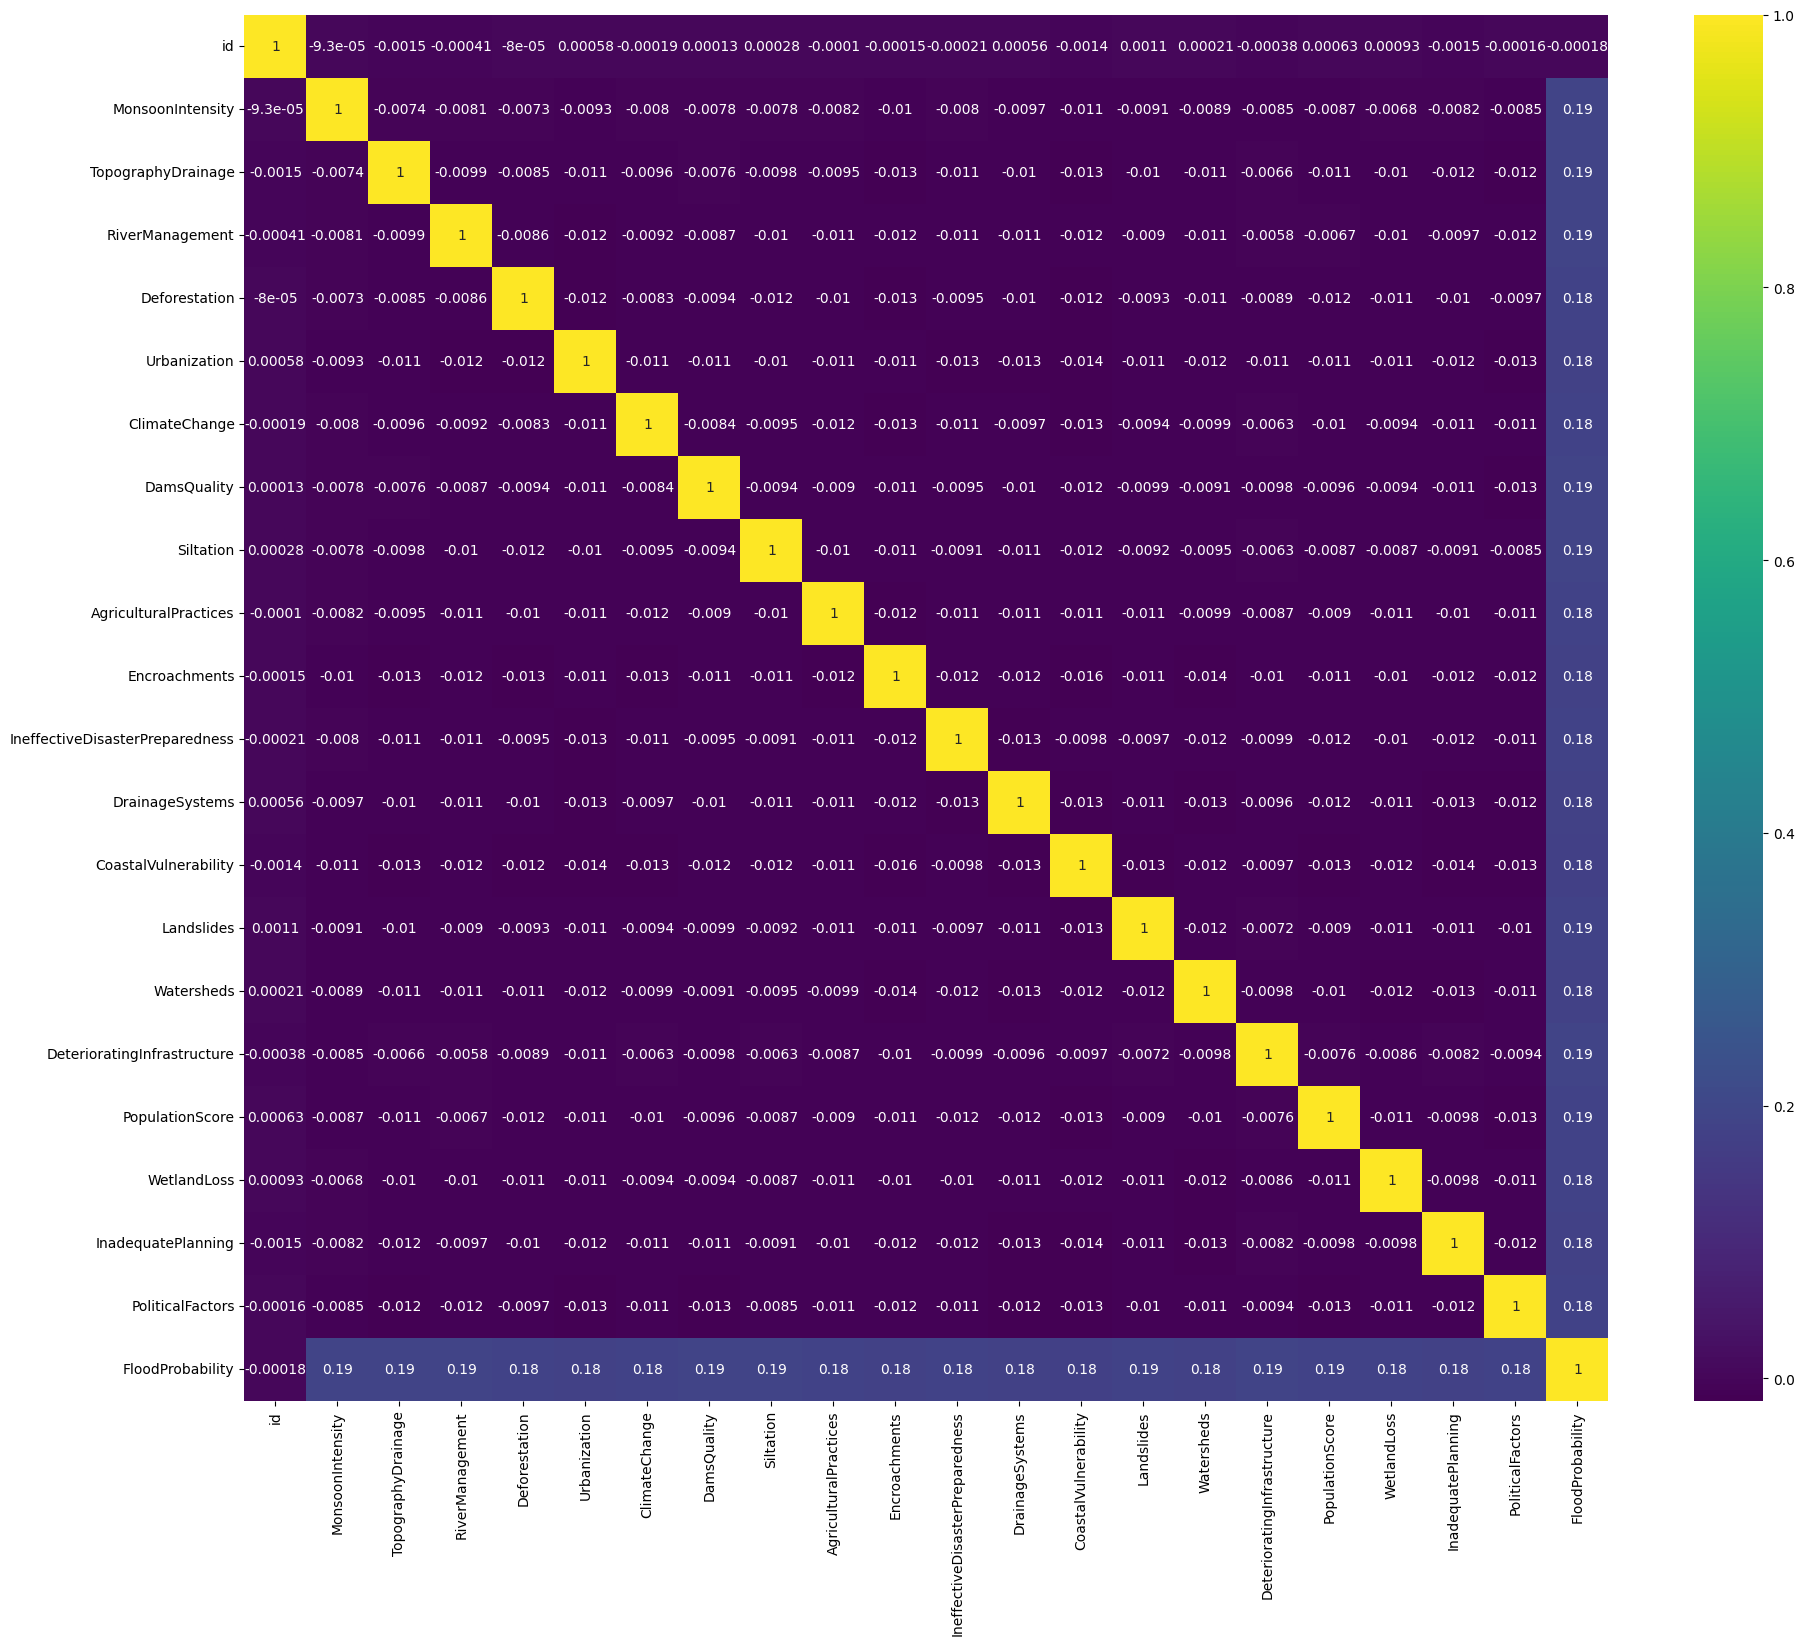

In [13]:
# HEATMAP
plt.figure(figsize=(22,18))
sns.heatmap(X_corr, annot = True, cmap = 'viridis')
plt.show()

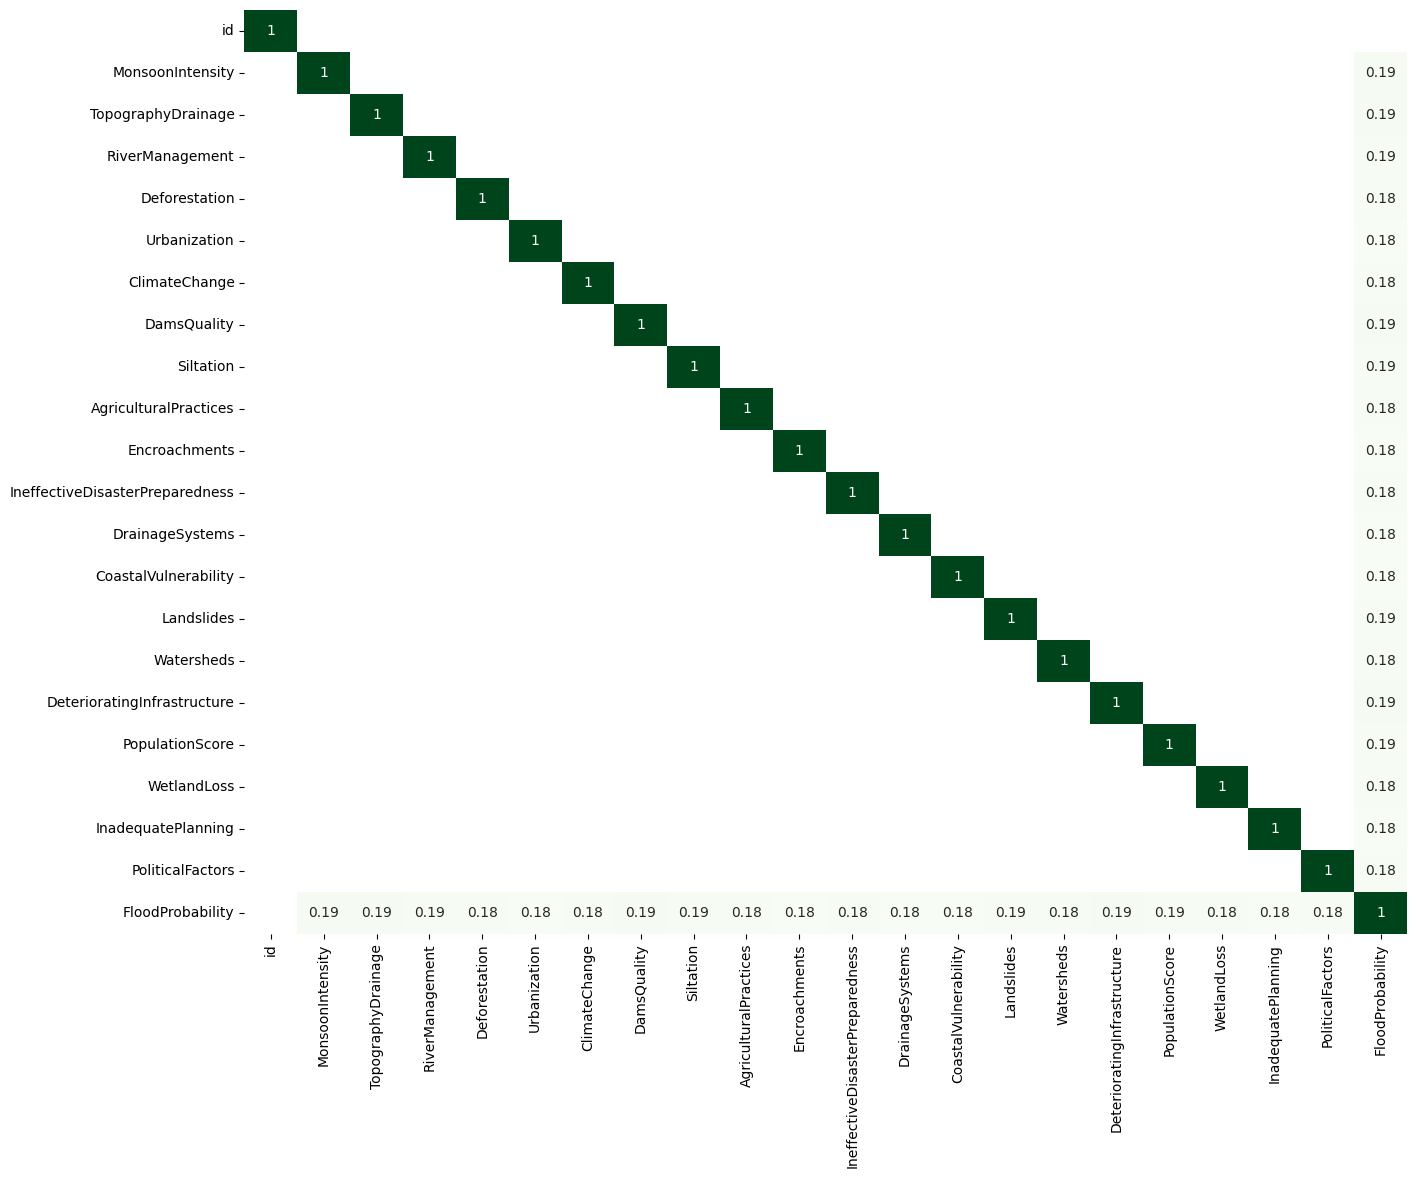

In [14]:
# Very strong correlation
plt.figure(figsize=(15,12))
sns.heatmap(X_corr, mask = (X_corr < 0.1), annot = True, cmap = 'Greens',cbar = False)
plt.show()

In [15]:
# We can see that every factor has a positive relation ranging from 0.18 to 0.19

In [16]:
X

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,0,5,8,5,8,6,4,4,3,3,...,2,5,3,3,5,4,7,5,7,3
1,1,6,7,4,4,8,8,3,5,4,...,9,7,2,0,3,5,3,3,4,3
2,2,6,5,6,7,3,7,1,5,4,...,6,7,3,7,5,6,8,2,3,3
3,3,3,4,6,5,4,8,4,7,6,...,5,2,4,7,4,4,6,5,7,5
4,4,5,3,2,6,4,4,3,3,3,...,5,2,2,6,6,4,1,2,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,3,7,8,7,2,2,1,4,6,4
1117953,1117953,2,2,4,3,9,5,8,1,3,...,5,9,4,4,3,7,4,9,4,5
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,5,6,5,5,2,4
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,6,8,5,3,4,6,7,6,4


In [17]:
# Feature Engineering
def cleaning(df):
    features = df.columns.tolist()
    df['mean_feature'] = 0.1*df[features].mean(axis = 1)
    df['max_feature'] = df[features].max(axis = 1)
    df['min_feature'] = df[features].min(axis = 1)
    df['std_feature'] = df[features].std(axis = 1)
    df['median_feature'] = 0.1*df[features].median(axis = 1)
    df['sum_feature'] = df[features].sum(axis = 1)
    df['variance_feature'] = df[features].var(axis = 1)
    df['range_feature'] = df['max_feature'] - df['min_feature']
    df['skew_feature'] = df[features].skew(axis = 1)
    df['kurtosis_feature'] = df[features].kurtosis(axis = 1)
    return df
    

In [18]:
X = cleaning(X)
test = cleaning(test)

### Split the data into training and testing set

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [21]:
# # Create a pipeline for scaling and instantiating the model
# pipeline = Pipeline([('scaler', StandardScaler()),
#                     ('ridge', Ridge(alpha = 0.1, solver = 'sag', tol = 0.001))])

In [22]:
# lasso_params = {
#     'alpha':100, 'tol':0.001
# }

In [23]:
# lasso = Pipeline([('scaler', StandardScaler()),
#                  ('lasso', Lasso(**lasso_params))])

In [24]:
linear = Pipeline([('scaler', StandardScaler()),
                  ('lin', LinearRegression())])

In [25]:
# param_grid = {
#     'ridge__alpha':[0.001, 0.01, 0.1, 10, 50, 100],
#     'ridge__fit_intercept':[True,False],
#     'ridge__solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag'],
#     'ridge__tol':[1e-4,1e-3,1e-2]
# }

In [26]:
# param_grid = {
#     'n_estimators': [700, 800,1000, 1200],
#     'max_depth':[9, 12, 15],
#     'min_samples_split': [2, 4, 6],
#     'min_samples_leaf' : [2, 5, 7],
# }, 

In [27]:
# rf = RandomForestRegressor()

In [28]:
# grid_search = GridSearchCV(rf, param_grid, scoring = 'r2', cv = 4)

In [29]:
# rf.fit(X_train, y_train)

In [30]:
# pipeline.fit(X_train, y_train)

# # # Get the best parameters and model
# # # best_param = grid_search.best_params_
# # # print(best_param)
# # # best_model = grid_search.best_estimator_
# # # print(best_model)

In [31]:
# lasso.fit(X_train,y_train)

In [32]:
linear.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lin', LinearRegression())])

In [33]:
'''
{'ridge__alpha': 0.1, 'ridge__fit_intercept': True, 'ridge__solver': 'sag', 'ridge__tol': 0.001}
Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.1, solver='sag', tol=0.001))])
'''

"\n{'ridge__alpha': 0.1, 'ridge__fit_intercept': True, 'ridge__solver': 'sag', 'ridge__tol': 0.001}\nPipeline(steps=[('scaler', StandardScaler()),\n                ('ridge', Ridge(alpha=0.1, solver='sag', tol=0.001))])\n"

In [34]:
# # # Use cross validation to evaluate the model
# score = cross_val_score(rf, X_train, y_train, scoring = 'r2', n_jobs = -1, cv = 5)
# gs_score = score.mean()

In [35]:
# gs_score

In [36]:
# # Use cross validation to evaluate the model
# score = cross_val_score(pipeline, X_train, y_train, scoring = 'r2', n_jobs = -1, cv = 5, )
# pipeline_score = score.mean()

In [37]:
# pipeline_score

In [38]:
# # Use cross validation to evaluate the model
# score = cross_val_score(lasso, X_train, y_train, scoring = 'r2', n_jobs = -1, cv = 5, )
# lasso_score = score.mean()

In [39]:
# lasso_score

In [40]:
# Use cross validation to evaluate the model
score = cross_val_score(linear, X_train, y_train, scoring = 'r2', n_jobs = -1, cv = 5, )
linear_score = score.mean()

In [41]:
linear_score

0.8450335594868493

In [42]:
# Predict the model
y_pred = linear.predict(X_test)

In [43]:
# pipeline_test_mse = mean_squared_error(y_test, y_pred)
# pipeline_test_mse

In [44]:
# Our metric which is going to be used for checking
gs_r2 = r2_score(y_test, y_pred)
gs_r2

0.8449592473240668

### 0.844!!! Looks decent for a first attempt...

In [45]:
# Prediction on test data
pred = linear.predict(test)

In [46]:
# Now the output 
output = pd.DataFrame({'id' : test.id, 'FloodProbability' : pred})
output.to_csv('submission.csv', index = False)

In [47]:
output

,id,FloodProbability
0,1117957,0.574377
1,1117958,0.455075
2,1117959,0.454755
3,1117960,0.466517
4,1117961,0.466690
...,...,...
745300,1863257,0.477455
745301,1863258,0.450226
745302,1863259,0.624909
745303,1863260,0.551579
